Como explorado no notebook de nossa [análise exploratória inicial](https://github.com/Fabiano23/descobertaRemedios/blob/main/Notebooks/AnaliseExploratoria.ipynb) em pesquisas de compostos químicos candidatos a se tornarem novos medicamentos para doenças, temos o problema de ter de analisar a ligação entre diversos genes e morte de células por seus diversos tipos.

Assim, a ideia de nosso projeto é conseguir agrupar os diversos genes e células em caixinhas menores para que as análises de novos compostos sejam facilitadas.

# *Como funcionam os algoritmos de Aprendizado de Máquina?*

Os modelos de aprendizagem de máquina possuem 3 tipos principais: 


## Supervisionado

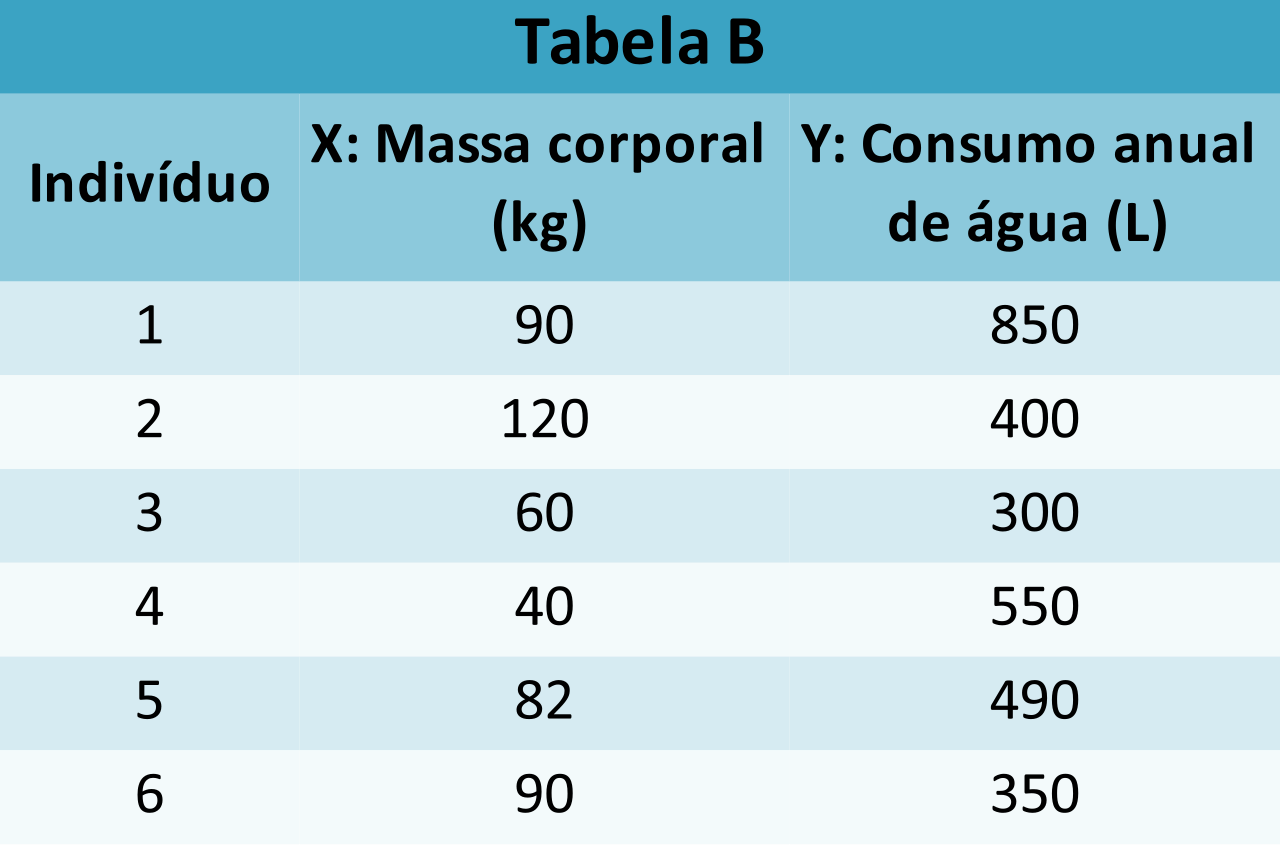

Fonte: [Wikipédia](https://pt.wikipedia.org/wiki/Ficheiro:Tabela_exemplo_B.svg)

Basicamente, o aprendizado supervisionado é quando o modelo aprende baseado em dados históricos, isto é, nós temos diversos dados de entrada e possuímos os dados de saída de algo que já aconteceu (foi medido).

Utilizando a imagem acima como exemplo, imagine que queremos determinar a massa corporal de uma pessoa baseada no seu consumo anual de água. Nós temos, neste caso, tanto o dados de entrada (consumo anual de água) no qual será feita alguma operação matemática que nos retornará uma resposta (a massa corporal da pessoa).




## Aprendizagem por reforço

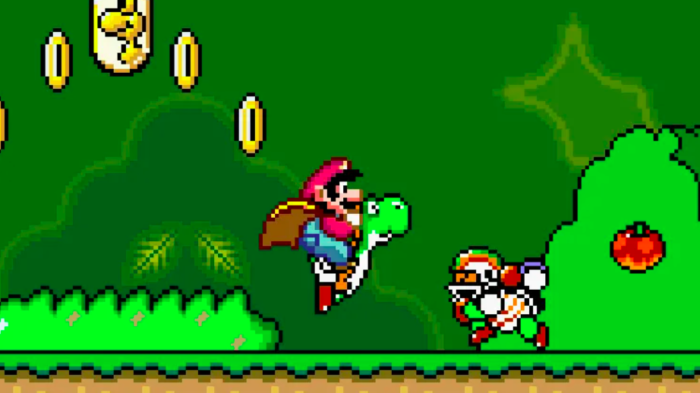

Fonte: [Tecnoblog](https://tecnoblog.net/409143/trilha-sonora-de-super-mario-world-e-restaurada-com-samples-originais/)

Já aprendizagem por reforço é quando o modelo aprende baseado em um ambiente com regras. Imagine um jogo do super mário: neste caso, nós temos um personagem, um ambiente e ações esperadas (todas as ações feitas pelo Mário pra conquistar pontos e não morrer) visando um objetivo (passar até a última fase). 

Assim, a partir de recompensas ou punições o modelo aprenderia as melhores ações a serem feitas. Digamos que daríamos -1 pra quando o Mário morresse por algum bicho e 10 quando ele passasse de fase. Neste caso, a partir de várias partidas jogadas e erros cometidos, o modelo entenderia que morrer é ruim porque sempre recebe uma punição (-1, valor negativo) quando isto ocorre e passar de fase é ótimo, já que recebe o valor 10 (valor positivo e alto) como recompensa quando isto acontece.

## *Não supervisionados*

Não supervisionado é quando temos dados de entrada, mas não temos dados de saída como exemplo. O nosso problema é justamente este. Nós temos as quantidades de expressões gênicas de cada grupo celular, mas não temos uma informação (coluna) de suas classificações em caixinhas menores pra que possamos comparar a influência de um grupo de genes em outros em determinado experimento.

## *Maldição da dimensionalidade*

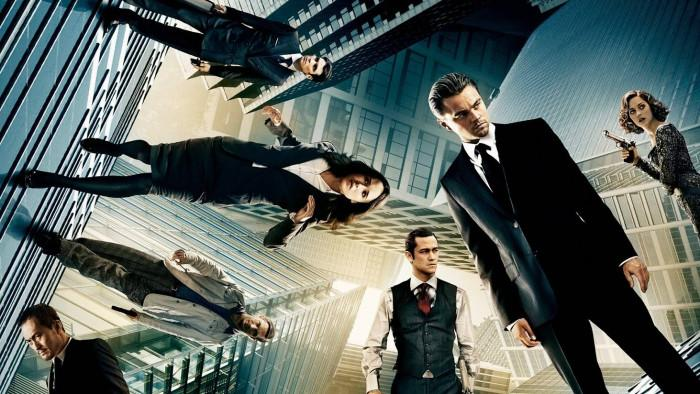

Fonte: [O barquinho cultural](https://obarquinhocultural.com/2020/07/18/critica-a-origem/)

Além do que já foi explicado, existe ainda um problema conhecido em Aprendizado de Máquina como maldição da dimensionalidade. 

Os algoritmos de Machine Learning no geral lidam com cada coluna de nosso dataframe (tabela) como um dimensão. Nós seres humanos conseguimos, por exemplo, visualizar objetos quando eles estão num espaço de até 3 dimensões (largura, altura e profundidade). Tentar olhar para um objeto em uma dimensão maior que isto não é possível pra gente.

Porém, apesar de não conseguimos olhar, conseguimos fazer operações matemáticas e trabalhar com objetos como se estivessem nesse espaço n-dimensional (n = número total de dimensões). É isto que a maioria dos algoritmos de ML fazem. Mas como a gente, a sua capacidade de lidar com várias dimensões não são ilimitadas. Podemos fazer uma analogia bacana com o filme [A Origem](https://pt.wikipedia.org/wiki/A_Origem) para tentar compreender melhor o que acontece. 

Dom Cobb (interpretado pelo Leonardo Di Caprio) é um "invasor" de sonhos com o objetivo de implementar determinada ideia o mais fundo no subconsciente das pessoas. No filme, o personagem principal consegue se aprofundar cada vez mais no subconsciente de seus alvos "sonhando dentro de sonhos". Nesse sentido, cada sonho "gerado" seria uma dimensão a mais gerada. 

Porém, quanto maior o número de dimensões/sonhos Dom Cobb (Leonardo DiCaprio) consegue se aprofundar, maior ele vai perdendo a noção do que é sonho e do que é real. Há dificuldade de manter a lógica comum (em camadas menores de sonho, o nosso 3D de cada dia) quando este espaço aumenta.

Os algoritmos de ML sofrem do mesmo mal. Geralmente, eles acabam perdendo performance quando passamos um número muito alto de colunas como variáveis preditoras. Esta maldição é, portanto, mais um fator pra que apliquemos técnicas de [clustering](https://en.wikipedia.org/wiki/Cluster_analysis) nos elementos que mais temos colunas, isto é, os genes e os tipos celulares visando a análise e descoberta de novos compostos.

# *Cluster*

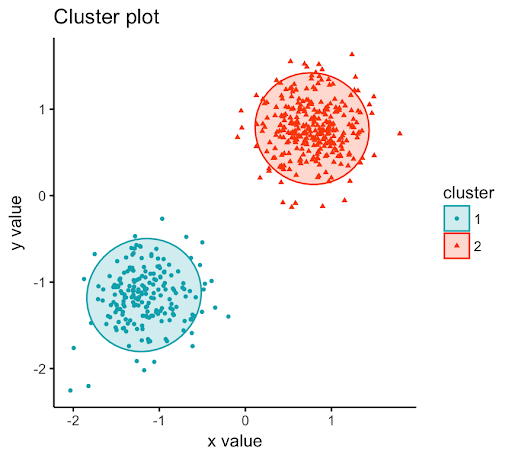

Fonte: [Statistical tools for high-throughput data analysis](http://www.sthda.com/english/articles/tag/pam-clustering/)

Técnicas de clusterização tem o objetivo de comparar indivíduos (em nosso contexto cada gene e morte celulares por seus tipos) e agrupá-los por semelhança. No geral, técnicas de clustering utilizam a noção de espaço para agrupar os indivíduos. Calculam a distância entre cada elemento dos dados e juntam aqueles mais próximos em um mesmo grupo (como na imagem acima).



## DBSCAN

Em nosso caso iremos utilizar o algoritmo [DBSCAN](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.121.9220), pois diferente de outros algoritmos de clusterização, ele nos retorna indivíduos considerados outliers, ou seja, não conseguiram se encaixar em grupo algum. O DBSCAN se baseia na densidade, regiões mais cheias de pontos próximos para criar os grupos. 

Principais elementos do algoritmo:

1) minínimo de pontos -> número de indivíduos pŕoximos a um determinado indivíduo (incluindo ele mesmo) para que este seja considerado um ponto central (agrupador);

2) perímetro dos pontos -> perímetro/círculo de alcance dos pontos em nossos dados

3) epsílon -> máximo de distância de um ponto (central ou inserido em um grupo) que um indivíduo precisa estar para que seja considerado do mesmo grupo;

Assim, um indivíduo só pode ser considerado de um grupo se ele for alcançável dentro do perímetro de um ponto central ou se ele estiver a uma distância epsílon de algum ponto já clusterizado. Indivíduos que não possuem nenhuma das duas premissas são classificados como outliers (destoantes dos demais).



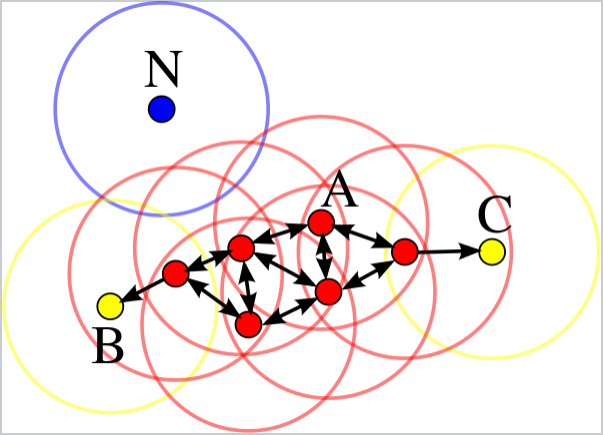

Digamos que mínimo de pontos igual a 4. Na imagem acima, o ponto A seria nosso ponto central já que 4 pontos (incluindo ele mesmo) estão dentro de seu perímetro (círculo formado a partir dele). Já os outros pontos vermelhos são pontos que se alcançam pela distância epsílon entre eles e são, portanto, considerados do mesmo grupo. Os pontos amarelos B e C são considerados pontos das bordas, já que estão dentro do perímetro de ao menos um dos pontos vermelhos, mas não estão tão próximos assim deles. Portanto, também são considerados do mesmo grupo. Por fim, o ponto N não é alcançado a uma distância epsílon pelos pontos agrupados e não está dentro do círculo de alcance de nenhum destes pontos. Nesse caso, N seria um outlier, um valor que destoa dos demais.

*Por que o DBSCAN?*

O algoritmo como explicado acima irá nos ajudar a diminuir a quantidade de células e genes separando-os por grupos a partir de suas combinações ao receberem os compostos. E ao contrário de outros algoritmos de cluster, o DBSCAN nos retornará grupos celulares e expressões gênicas considerado(a)s destoantes, o que no contexto de pesquisa pode ser muito valioso para compreender melhor um composto específico e suas ações de acordo com características das células; dos genes; tempo do experimento e tamanho da dose. 

# Importando bibiotecas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
#Tamanho padrões das figuras neste notebook
plt.rcParams['figure.figsize'] = (12, 8)

## Dados

In [3]:
#Leitura dos dados
url_dados_experimentos= 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados_experimentos= pd.read_csv(url_dados_experimentos, compression = 'zip')

In [4]:
#Trocando nome da coluna droga por composto pra manter tecnicamente o nome correto
mapa = {'droga': 'composto'}
dados_experimentos.rename(columns=mapa, inplace=True)
dados_experimentos.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [5]:
#Separando dataframe somente com os genes. Dataframe transposto para que cada linha nossa represente um gene
dados_genes= dados_experimentos[[coluna for coluna in dados_experimentos.columns if coluna.startswith('g-')]]
dados_genes.sample(3)

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
5257,-1.4740,-0.1675,0.3301,0.4083,-1.2660,0.4471,0.2006,-1.4690,0.0906,0.0902,0.4608,-0.1697,0.1353,0.1130,-0.3321,-0.0047,0.1021,0.0900,0.8822,0.2920,0.3441,-0.8773,-0.5653,0.5437,-0.6216,0.8501,0.3699,0.6968,-0.0107,0.0517,0.2345,0.5026,-1.1930,0.8845,-0.2059,-0.6594,0.2933,0.0174,0.3738,1.4650,...,-0.8820,-0.1527,-1.4270,0.1991,0.6159,1.2890,0.0236,-0.5329,0.0141,0.6057,0.7377,-0.6069,0.2418,1.1640,0.7408,0.8371,-0.0812,-0.5178,0.4232,0.2612,0.2502,-0.4001,0.4643,-0.1177,0.2260,-0.4631,-0.4565,0.0006,-0.3236,0.3875,0.3493,0.1234,0.5263,-0.6004,0.8154,1.3830,1.0570,0.1248,0.7389,-0.0651
22842,-0.6288,0.3998,0.3891,-0.8348,0.1146,0.4806,-0.4461,-0.1637,-1.1050,0.5752,-0.7627,-0.4113,-0.0278,0.5228,0.0447,0.1238,1.1520,-0.6701,0.1416,0.2577,0.4557,-0.6010,-0.1332,-0.5507,0.0669,-0.7824,0.6908,-0.4928,-0.4338,0.0288,0.9776,0.8457,-0.8048,0.1238,0.6786,-1.1800,0.1414,0.6185,0.4858,-0.4965,...,1.0190,0.1738,-0.5988,0.0636,1.5060,-0.5349,0.5864,0.6315,-0.4721,0.9750,0.2046,-1.4490,-0.3299,0.5275,-0.3584,0.4220,0.5749,1.1200,0.3625,1.1080,-0.5562,-0.7969,-0.2418,-0.6415,0.8155,-0.2255,0.3130,0.7546,0.2691,-0.2512,0.6862,0.5251,-0.3049,-0.4704,0.3781,0.0599,0.0742,0.5637,0.7250,0.2880
14080,-0.1415,0.5658,1.2770,1.6040,-0.9988,0.3935,-0.1908,0.3486,-0.5961,0.2208,1.0410,0.2080,0.4496,0.2628,1.5540,-1.1990,-0.4588,0.9242,0.2563,0.6519,-1.0190,-0.1021,0.7409,0.4669,0.2738,-0.3440,0.8209,0.4729,-0.3129,-0.3079,0.6131,-0.6807,0.2562,-0.5924,-0.5997,-0.5518,0.3890,-1.2430,0.4383,-0.2330,...,0.1532,0.2371,0.4020,-0.5487,0.4190,0.3341,0.0135,0.9627,-0.3233,-0.4232,0.0761,0.1122,-0.0041,0.0871,0.3780,-0.0666,-0.2510,0.0103,0.4428,0.0103,-1.3120,0.8177,0.2027,-0.6600,-0.0442,0.0466,-0.4227,-0.6817,0.8730,-0.2511,1.7000,1.1620,-0.5187,-1.2630,1.0910,1.2540,0.6374,0.7379,0.9144,-0.3566


# *Otimização de Parâmetros*

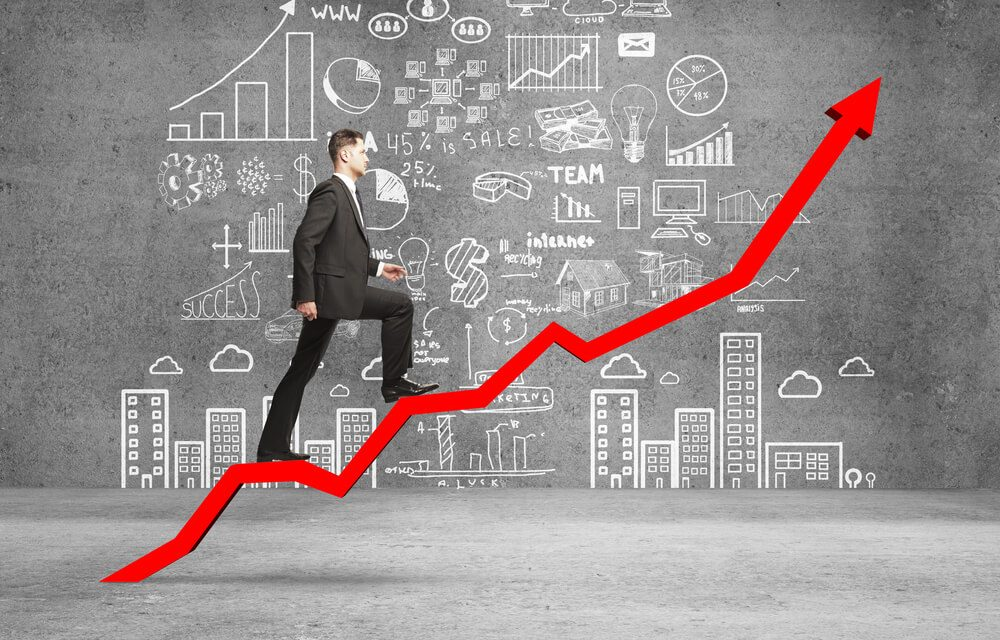

Fonte: [Simova](https://blog.simova.com.br/otimizacao-de-processos-como-estruturar/)

Como mencionado no notebook da [análise exploratória inicial](https://github.com/Fabiano23/descobertaRemedios/blob/main/Notebooks/AnaliseExploratoria.ipynb), os modelos de Aprendizado de Máquina recebem dados de entrada, uma operação a ser realizada entre esses dados e um dado de saída. 

O exemplo utilizado foi o mais simples possível, a operação matemática *2 + 2 = 4*. Nossos elementos seriam:

a) dados de entrada -> 2 e 2

b) operação a ser realizada entre esses dados -> soma(+)

c) dado de saída -> 4

A otimização de modelos diz respeito a otimizar/melhorar as operações a serem realizadas (parâmetros) tendo em vista a maior acurácia e, consequentemente, confiabilidade dos dados de saída.

## *Processo*

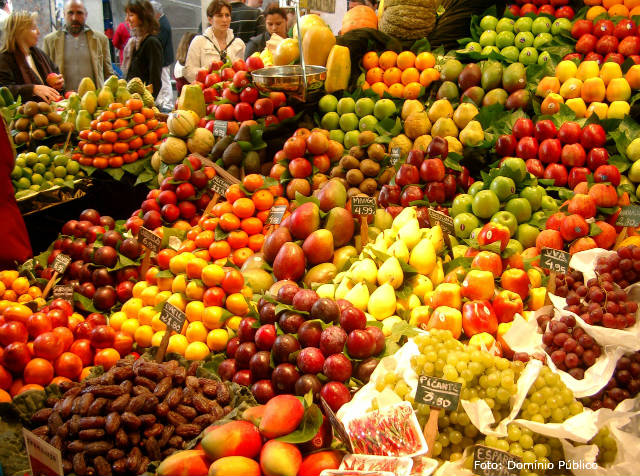

Fonte: [Tecnologia e Treinamento](https://www.tecnologiaetreinamento.com.br/agricultura/como-aumentar-a-vida-util-dos-produtos-na-prateleira/)

Imagine que você tenha uma prateleira com vários tipos de frutas e queira saber qual combinação entre estas frutas faz o melhor suco. O primeiro passo possível é anotar em pedaços de papel separado todas as combinações possíveis entre estas frutas e inserir dentro de um pote. No contexto de aprendizagem de máquina, os nossos parâmetros seriam as frutas.

Assim, existem duas maneiras possíveis de se fazer a busca pela melhor combinação de parâmetros:

1) Com a Randomized Search (Busca aleatória em inglês) -> você irá fazer uma escolha de quantos sucos selecionando uma combinação aleatório dentro do pote;

2) Ou com a Grid Search (busca por grade) -> você irá testar exatamente todas as combinações de frutas que está dentro do pote.

O objetivo das duas formas é a mesma, selecionar a combinação de frutas (parâmetros) que fazem o melhor suco (modelo com melhor performance). Porém, dependendo da quantidade de frutas que você tem, pode ser indicado selecionar uma quantidade não muita alta de sucos a serem feitos e utlizar a busca aleatória. Isto seria melhor em caso de uma quantidade muito alta de combinação de frutas a serem testadas e o tempo levado para isso. Muitas das vezes, a busca aleatória encontra resultados satisfatórios com um tempo bem menor que a busca por grade.

*Técnica de validação cruzada*

Junto a isso é possível também utilizar a técnica de [Repeated classified Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html) que separa os nossos dados em cada combinação de parâmetros testada por vários conjuntos aleatórios de treino e teste, ou seja, ao invés de um conjunto de treino e teste aleatório geramos vários para cada combinação de parâmetros. Esta técnica é importante para evitar o que é chamado de [Overfitting](https://en.wikipedia.org/wiki/Overfitting) (super ajuste em inglês), isto é, o aprendizado quase perfeito do modelo ao conjunto de treino que quando exposto a dados que ele nunca viu, suas predições são muito mal feitas. Assim, ao mesmo tempo que ajustamos os parâmetros do modelo fazemos a sua validação. 

Uma analogia interessante para compreender o que é overffitting: imagine que está tentando ensinar para uma criança o que é um cachorro. Se você apresentar pra criança sempre a mesma foto de um mesmo cachorro para ensiná-la, quando perguntada sobre um outro cachorro em uma foto diferente ela dificilmente saberá que aquilo é um cão. Para que ela de fato aprenda, cachorros de diferentes tipos, tamanhos, cores e em comparação com outros animais precisam ser apresentados.

Vamos iniciar otimizando somente um parâmetro epsílon utilizando o [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html) (vizinhos mais próximos) do Sklearn:

epsílon -> a quanto de distância de um ponto já agrupado um outro ponto precisa estar pra ser considerado do mesmo grupo.

O algoritmo Nearest Neighbors (vizinhos mais próximos) irá calcular a distância entre cada grupo de célula e irá nos retornar essas métricas. A partir disso, fazemos um gráfico que nos dirá o melhor valor de epsílon para inserir como parâmetro no DBSCAN. A regra que utilizaremos é conhecida como regra do cotovelo. 

No eixo x (horizontal) temos o índice (posição na tabela) de cada grupo de célula, no eixo y (vertical) temos a distância de cada grupo para o próximo a ele. Nesse sentido, enquanto a linha permanece homogênea, temos uma distância próxima de um indivíduo para o outro. Quando essa linha faz uma curva e perde o padrão, significa que os pontos começaram a se distanciar naquela quantidade de epsílon (eixo y do gráfico) específica.

Portanto, a parte onde se parece com um cotovelo, uma curva, é onde se encontra o nosso valor óptimo para epsílon.


In [6]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dados_genes)
distancias, indices = nbrs.kneighbors(dados_genes)

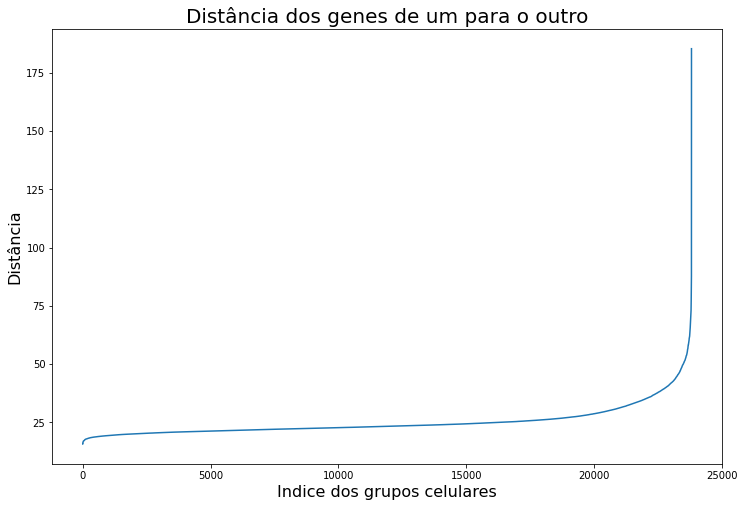

In [7]:
#Plotando melhor epsílon a ser escolhido pela regra do cotovelo
distancias = np.sort(distancias, axis=0)
distancias = distancias[:, 1]
plt.plot(distancias)
plt.title('Distância dos genes de um para o outro', fontsize=20)
plt.ylabel('Distância', fontsize=16)
plt.xlabel('Indice dos grupos celulares', fontsize=16);

Neste caso, nosso melhor epsílon é algo por volta de 45 e iremos utilizar ele no DBSCAN.

In [8]:
#Instanciando modelo DBSCAN
modelo_dbscan_genes= DBSCAN(eps=45, min_samples=5, n_jobs=-1).fit(dados_genes)

#Classificacao dos grupos em cada linha do nosso dataframe
labels_genes = modelo_dbscan_genes.labels_

#Inserindo cluster de cada grupo celular em nossos dados
dados_experimentos= dados_experimentos.assign(cluster= labels_genes)

In [9]:
#Total de grupos gerados
total_clusters= len(dados_experimentos['cluster'].unique())
print(f'Total de Clusters gerados: {total_clusters}')

Total de Clusters gerados: 23


Vemos que o nosso modelo gerou, a partir dos parâmetros passados, 23 grupos diferentes de Genes. Agora é muito mais fácil compararmos e produzirmos análises do que com o número inicial, isto é, 771 genes.

In [11]:
#Inserindo cluster de cada grupo celular em nossos dados
dados_experimentos= dados_experimentos.assign(cluster_genes= labels_genes)

In [12]:
#Quantidade de experimentos por clusters
dados_experimentos['cluster'].value_counts()[:10]

 0     22560
-1       708
 2       203
 1       144
 3        48
 7        23
 5        17
 9        15
 6        13
 15        8
Name: cluster, dtype: int64

Vemos que temos um número alto de clusters classificados como 0. Nesse sentido, tivemos um alto número de grupos celulares que tiveram suas expressões genéticas se comportando de forma similar independente do composto recebido, da hora e da dose.

Lembrando que -1 são os indivíduos (grupos celulares) considerados outliers. Neste caso, indivíduos que tiveram suas expressões genéticas destoantes dos demais. Seria interessante compararmos brevemente a quantidade de experimentos feitos em cada cluster (0 e -1) por tempo e dose.

In [13]:
cluster_maiores= dados_experimentos.query('cluster in [-1, 0]')

pd.crosstab(index= cluster_maiores['cluster'], 
           columns= [cluster_maiores['tempo'], cluster_maiores['dose']], normalize= 'index').T

cluster           -1         0
tempo dose                    
24    D1    0.111582  0.163431
      D2    0.122881  0.164317
48    D1    0.177966  0.182048
      D2    0.213277  0.163785
72    D1    0.148305  0.163032
      D2    0.225989  0.163387

Conseguimos já perceber algumas coisas interessantes. Indivíduos no cluster -1 (destoantes) tiveram entre si mais doses 2 recebidas e foram analisados mais no período de 48 e 72 horas do que os indivíduos do grupo 0 (maioria dos dados). Isto pode nos indicar possíveis caminhos a se analisar de expressões genéticas destoantes quando o experimento possui essa configuração. 

## Células

Vamos realizar o agrupamento das mortes celulares da mesma maneira que fizemos com os genes

In [14]:
#Dados somente da morte celular
dados_celulas= dados_experimentos[[coluna for coluna in dados_experimentos.columns if coluna.startswith('c-')]]
dados_celulas.sample(3)

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
468,0.6001,0.6363,0.8441,0.8865,1.1070,0.6829,0.4508,0.8797,0.4325,0.4279,1.8620,0.7411,1.0410,0.8562,1.1340,0.9868,-0.3409,0.3224,0.0025,0.7745,1.280,0.1433,0.1839,-1.3700,1.4010,0.1875,0.8072,0.3689,1.1180,0.6341,0.4321,1.3510,0.0008,0.5034,0.7954,0.5220,0.8355,0.7194,1.0860,0.6128,...,1.2660,0.2725,0.9403,0.7904,-0.4023,0.9342,1.4540,1.4030,0.1206,1.4180,-0.2034,0.6960,0.6259,1.4510,1.1110,1.2930,-0.2029,0.2194,1.7140,-0.0337,0.8308,0.3467,0.7615,-0.0323,1.7580,0.9933,-0.3354,-1.0250,0.7740,-0.0576,0.9820,0.9947,0.9489,0.0920,0.839,1.9580,0.4451,-0.0936,0.7103,0.5675
10204,-0.8479,-0.2616,-0.2503,0.2845,1.9120,-0.4361,-0.2485,-0.8082,-1.6620,-0.8955,-0.6108,-0.9780,-0.0002,-0.0989,-0.6483,0.0805,-0.5449,-0.4291,0.1224,-1.0250,-0.622,-1.4020,-0.2853,-0.1458,0.5426,-1.0160,0.6260,0.7727,-1.1910,-0.9945,-1.2240,-0.9669,0.4490,-0.0708,1.1370,-0.5275,-0.0954,-0.1458,-0.0832,-0.9249,...,-0.3661,-0.9402,-1.0640,-0.3613,-1.1790,0.2280,-0.6107,-0.0962,0.3727,-0.2538,-0.4341,-1.3810,-0.2970,-0.1073,0.7738,-0.8622,-0.2166,-0.5039,0.1150,-2.1210,-0.9559,0.3643,0.0833,-0.1311,-0.2588,-2.0190,0.6885,-0.1912,-0.1537,-0.3996,-0.8144,-2.2200,0.0778,0.0371,-0.407,-0.1901,-1.2760,0.3088,-0.6569,0.4627
7577,0.9115,-0.5917,-0.5668,0.7259,-0.1041,-0.7207,-0.4764,-1.3490,-0.8904,-0.1808,-0.2053,-0.7059,-0.6150,0.8077,-0.0462,-0.0785,-1.3200,-0.6392,0.3970,-0.1228,-1.011,0.4595,0.2334,-0.2667,0.8158,-0.4071,-0.3726,-0.2333,0.5612,0.4266,-0.7346,-0.6991,-1.5070,0.1828,0.0383,-0.1311,0.4971,-0.1183,0.1535,-1.7230,...,0.5207,-0.9296,-0.1729,-0.0205,-0.0866,0.1921,-0.4757,0.3161,-0.0645,0.7123,0.0111,-0.2525,0.5393,0.1313,-1.1240,-0.5588,-1.4000,0.5596,-0.6596,0.4248,-0.0503,-0.9856,0.9739,-0.7622,-1.2690,0.1073,-1.2000,-0.1334,-0.1781,0.5840,-0.0683,0.2913,-0.3896,0.3368,0.343,0.2864,-0.4645,-1.4280,-0.1788,-0.2200


In [15]:
#Achando o melhor valor de epsílon com Nearest Neighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dados_celulas)
distancias, indices = nbrs.kneighbors(dados_celulas)

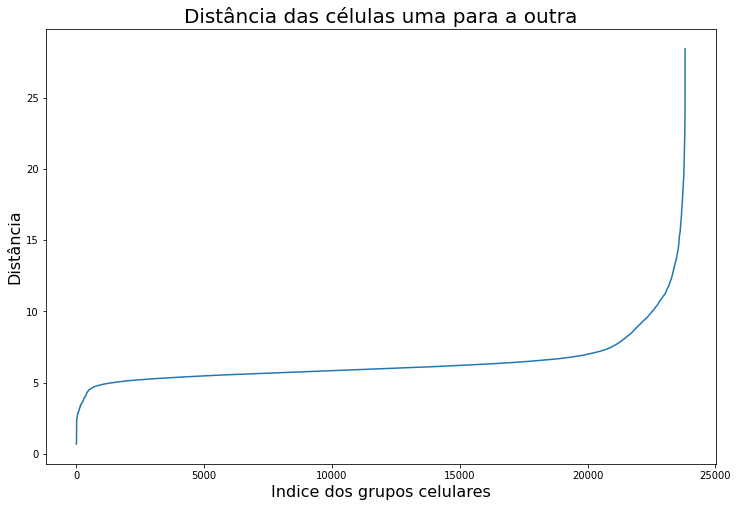

In [16]:
#Plotando melhor epsílon a ser escolhido pela regra do cotovelo
distancias = np.sort(distancias, axis=0)
distancias = distancias[:, 1]
plt.plot(distancias)
plt.title('Distância das células uma para a outra', fontsize=20)
plt.ylabel('Distância', fontsize=16)
plt.xlabel('Indice dos grupos celulares', fontsize=16);

Vemos que o melhor número de epsílon é aproximadamente 7. Então indicaremos este valor ao DBSCAN.

In [17]:
#Instanciando modelo DBSCAN com melhor epsílon
modelo_dbscan_celulas= DBSCAN(eps=7, min_samples=5, n_jobs=-1).fit(dados_celulas)

#Classificacao dos grupos em cada linha do nosso dataframe
labels_celulas = modelo_dbscan_celulas.labels_

#Inserindo cluster de cada grupo celular em nossos dados
dados_experimentos= dados_experimentos.assign(cluster_celulas= labels_celulas)

# Próximos passos

*É importante destacar o que pensamos em fazer, mas que não conseguimos devido o tempo para a entrega do projeto e problemas que capacidade computacional para sua realização.* 

1) Otimizar todos os parâmetros do DBSCAN utilizando técnicas de GridSearch/RandomizedSearch junto a modelos de classificação. Neste caso, após fazermos a separação dos genes e das células em cluster, tentaríamos validar a acurácia dessa classificação por meio de modelos que classificassem genes e células por seus respectivos grupos gerados pelo DBSCAN.

2) Se após esta validação feita, o modelo não possuísse uma acurácia satisfatória, explorar outras tecnicas de clusterização e repetir o processo de validação de modelo.

3) Após encontrar um modelo satisfatório, iniciar análises para tentar observar o que compõe cada cluster pelos compostos mais testados. Assim, seríamos guiados por perguntas como: 

a) Grupos de genes ou morte celulares classificados como outliers (se seguissemos com um modelo que os identificasse) possue qual media/mediana de mortes após aplicação do composto; 

b) Eles possuem comportamentos diferenciados entre si em termos do tempo e da dose recebida.

Faríamos perguntas do mesmo tipo comparando os clusters gerados.

4) Após isso, faríamos a contagem de Mecanismos de Ativação ativados para cada experimento e analisaríamos esta variável tendo em vista os clusters gerados. Assim, faríamos perguntas tais como:

1) Quais grupos ativaram maior número de mecanismos de ativação? Quais as características mais preponderante dos seus experimentos (dose, hora e composto recebido);

2) Quais grupos não tiveram nenhum mecanismo ativado e, da mesma maneira, quais características mais preponderantes dos seus experimentos?

Assim, de modo geral, a ideia seria tentar buscar por padrões mais chamativos que diferenciasse um cluster gerado de outro.

# Referências

[DNA](https://en.wikipedia.org/wiki/DNA)

[Introduction: What Is DNA?](https://www.nature.com/scitable/topicpage/introduction-what-is-dna-6579978/)

[Drug discovery: passado, presente e futuro](https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit)

[Expressão gênica: o caminho da informação biológica](https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view)

[Repurposing drugs to manage COVID-19 progression](https://www.embl.org/news/science/repurposing-drugs-manage-covid19-progression/)

[Genes do sistema imune podem explicar a resistência e a suscetibilidade ao novo coronavírus](https://jornal.usp.br/ciencias/genes-do-sistema-imune-podem-explicar-a-resistencia-e-a-suscetibilidade-ao-novo-coronavirus/)

[A Next Generation Connectivity Map: L1000 Platform and the First 1,000,000 Profiles](https://pubmed.ncbi.nlm.nih.gov/29195078/)

[Cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

[On the theory and construction of k-clusters](https://academic.oup.com/comjnl/article/15/4/326/351493)

[A density-based algorithm for discovering clusters in large spatial databases with noise (1996)](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.121.9220)

[DBSCAN Algorithm: Complete Guide and Application with Python Scikit-Learn](https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d)

[How DBSCAN works and why should we use it?](https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80)

[DBSCAN Clustering — Explained
](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556)

[An introduction to the DBSCAN algorithm and its Implementation in Python.](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html)

[How to Master the Popular DBSCAN Clustering Algorithm for Machine Learning](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)

[Visualizing DBSCAN Clustering](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

[Comparing Python Clustering Algorithms](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html)